In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
data = pd.read_csv("LoanApprovalPrediction.csv")

In [7]:
data['Credit_History'].value_counts()

Credit_History
1.0    463
0.0     86
Name: count, dtype: int64

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# drop the null values
data = data.dropna()

In [11]:
data.reset_index(drop = True,inplace = True)

In [12]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# duplicate check
data.duplicated().sum()

0

In [15]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            505 non-null    object 
 1   Gender             505 non-null    object 
 2   Married            505 non-null    object 
 3   Dependents         505 non-null    float64
 4   Education          505 non-null    object 
 5   Self_Employed      505 non-null    object 
 6   ApplicantIncome    505 non-null    int64  
 7   CoapplicantIncome  505 non-null    float64
 8   LoanAmount         505 non-null    float64
 9   Loan_Amount_Term   505 non-null    float64
 10  Credit_History     505 non-null    float64
 11  Property_Area      505 non-null    object 
 12  Loan_Status        505 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 51.4+ KB


In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [17]:
# drop the Loan_ID column. Because it is not need in prediction of data

data = data.drop("Loan_ID",axis = 1)

In [18]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [19]:
data['Loan_Status'].value_counts()

Loan_Status
Y    353
N    152
Name: count, dtype: int64

<Axes: xlabel='Gender'>

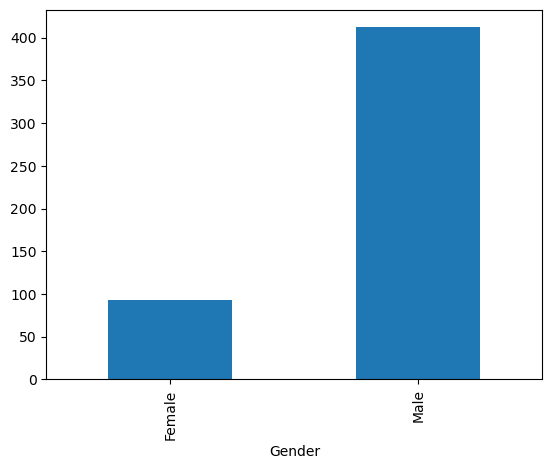

In [20]:
# Some Visualizations

data.groupby("Gender")['Loan_Status'].count().plot(kind = "bar")

<Axes: ylabel='Loan_Status'>

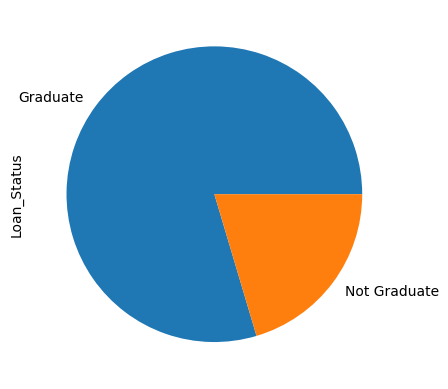

In [21]:
# Education wise Loan approval status
data.groupby("Education")['Loan_Status'].count().plot(kind = "pie")

In [22]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
# pandas encoding
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

In [24]:
#E Married
data['Married'] = data['Married'].map({'Yes':0,'No':1})

In [25]:
# Education
data['Education'] = data['Education'].map({"Graduate":0,"Not Graduate":1})

In [26]:
# Self Employeed
data['Self_Employed'] = data['Self_Employed'].map({"Yes":0,"No":1})

In [27]:
# Property_area
data['Property_Area'] = data['Property_Area'].map({"Semiurban":0,"Rural":1,"Urban":2})

In [28]:
data['Property_Area'].unique()

array([1, 2, 0], dtype=int64)

In [29]:
# loan status
data['Loan_Status'] = data['Loan_Status'].map({"Y":0,"N":1})

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             505 non-null    int64  
 1   Married            505 non-null    int64  
 2   Dependents         505 non-null    float64
 3   Education          505 non-null    int64  
 4   Self_Employed      505 non-null    int64  
 5   ApplicantIncome    505 non-null    int64  
 6   CoapplicantIncome  505 non-null    float64
 7   LoanAmount         505 non-null    float64
 8   Loan_Amount_Term   505 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Property_Area      505 non-null    int64  
 11  Loan_Status        505 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 47.5 KB


<Axes: >

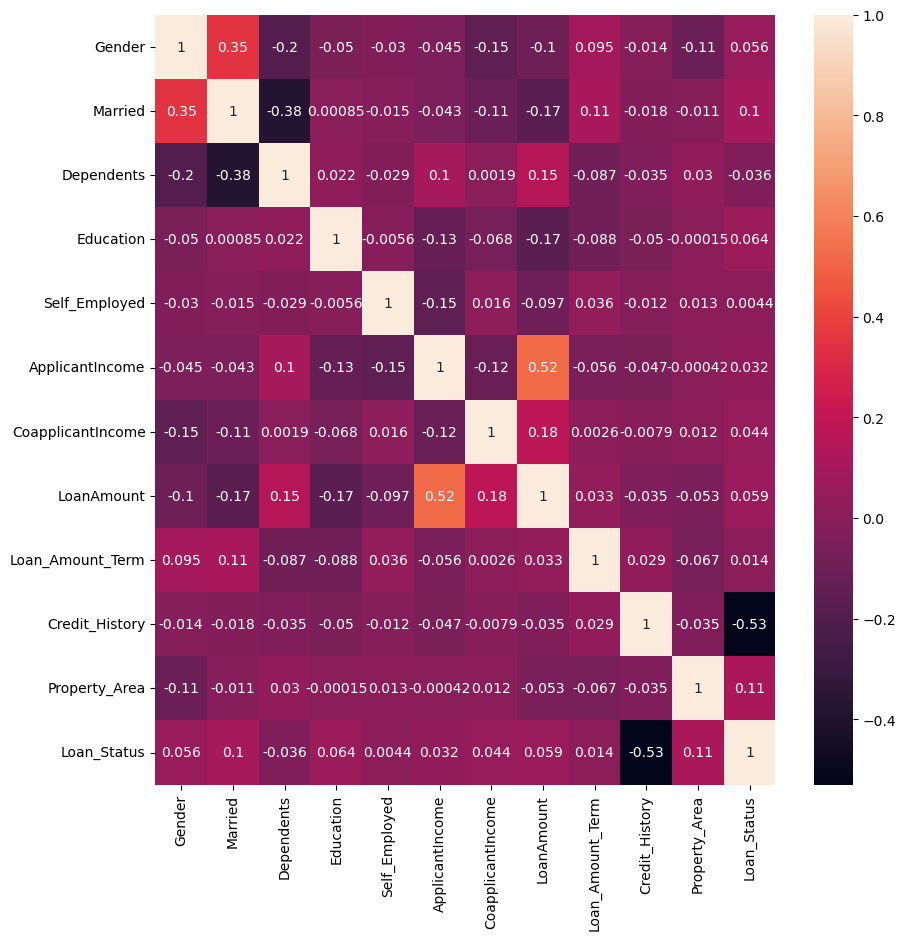

In [31]:
# lets check the correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [32]:
# dependent and independent features
X = data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']

In [33]:
X['Credit_History'].value_counts()

Credit_History
1.0    434
0.0     71
Name: count, dtype: int64

In [34]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
# scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression


lg_model = LogisticRegression()

In [38]:
lg_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [39]:
y_pred = lg_model.predict(X_test_scaled)

In [40]:
# model metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8486842105263158
[[108   1]
 [ 22  21]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       109
           1       0.95      0.49      0.65        43

    accuracy                           0.85       152
   macro avg       0.89      0.74      0.77       152
weighted avg       0.87      0.85      0.83       152



In [41]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,1,4583,1508.0,128.0,360.0,1.0,1,1


In [42]:
lg_model.predict(scaler.transform([[0,0,1.0,1,2,45324,32434,123,400,1.0,2]]))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [43]:
# hyperparameter tuning
penalty = ['l1','l2','elasticnet']
c = [100,10,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [44]:
params = dict(penalty =penalty,C = c,solver = solver)

In [45]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [46]:
# Gridsearch cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [47]:
cv = StratifiedKFold()

In [48]:
grid = GridSearchCV(estimator=lg_model,param_grid=params,cv = cv,n_jobs=-1)

In [49]:
grid.fit(X_train_scaled,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [50]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [51]:
grid_pred = grid.predict(X_test_scaled)

In [52]:
# model metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

0.8552631578947368
[[108   1]
 [ 21  22]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       109
           1       0.96      0.51      0.67        43

    accuracy                           0.86       152
   macro avg       0.90      0.75      0.79       152
weighted avg       0.87      0.86      0.84       152



In [53]:
grid.predict(scaler.transform([[0,0,1.0,1,2,45324,32434,123,4,1.0,2]]))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [57]:
# saving model and Standardscaler to pickle file 
import joblib

joblib.dump(grid,"model.pkl")

['model.pkl']

In [59]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [55]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
173,0,0,1.0,0,0,7787,0.0,240.0,360.0,1.0,2
274,0,0,2.0,0,0,2500,4600.0,176.0,360.0,1.0,1
490,0,0,2.0,1,0,6383,1000.0,187.0,360.0,1.0,1
72,0,0,0.0,0,1,5695,4167.0,175.0,360.0,1.0,0
305,1,1,0.0,0,0,2764,1459.0,110.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
440,0,0,0.0,0,1,6133,3906.0,324.0,360.0,1.0,2
23,0,1,0.0,1,1,1442,0.0,35.0,360.0,1.0,2
225,0,0,0.0,0,1,2620,2223.0,150.0,360.0,1.0,0
432,0,0,0.0,0,1,3775,0.0,110.0,360.0,1.0,0
